<a href="https://colab.research.google.com/github/gustavoroque97/previs-o-de-renda/blob/main/projeto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

<span style="color:red">ESCREVER AQUI</span>


## Etapa 2 Crisp-DM: Entendimento dos dados
<span style="color:red">ESCREVER AQUI</span>


### Dicionário de dados

<span style="color:red">ESCREVER AQUI</span>


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência                                      | object|
| id_cliente              |  Identificação do cliente                                     | int64|
| sexo                    |  Sexo do cliente                                    | object |
| posse_de_veiculo        | Cliente possui veículo?                               | bool|
| posse_de_imovel         |  Cliente possui imóvel?                                    | bool|
| qtd_filhos              | Quantidade de filhos                                     | int64|
| tipo_renda              |  Tipo de renda do cliente                                    |object|
| educacao                | Escolaridade do cliente                                   | object|
| estado_civil            |  Estado civil                                     | object|
| tipo_residencia         |  Tipo de residência                                   | object|
| idade                   |  Idade do cliente                              | int64|
| tempo_emprego           |  Tempo que o cliente está empregado                                    | float64|
| qt_pessoas_residencia   | Quantidade de pessoas na residência                                     | float64|
| renda                   | Renda do cliente                                 | float64|





#### Carregando os pacotes

In [ ]:
!pip install ydata_profiling

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<span style="color:red">ESCREVER AQUI</span>


#### Carregando os dados

<span style="color:red">ESCREVER AQUI</span>


In [ ]:
renda = pd.read_csv('/content/previsao_de_renda.csv')

In [ ]:
renda.dtypes

Unnamed: 0                 int64
data_ref                  object
id_cliente                 int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
dtype: object

In [ ]:
renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


#### Entendimento dos dados - Univariada
Avaliando a distribuição de todas as variáveis:

In [ ]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
prof.to_file('/content/renda_analisys.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<span style="color:red">ESCREVER AQUI</span>


### Entendimento dos dados - Bivariadas




<span style="color:red">Vamos avaliar a correlação entre as variáveis.</span>


In [ ]:
renda['data_ref'] = pd.to_datetime(renda['data_ref'])

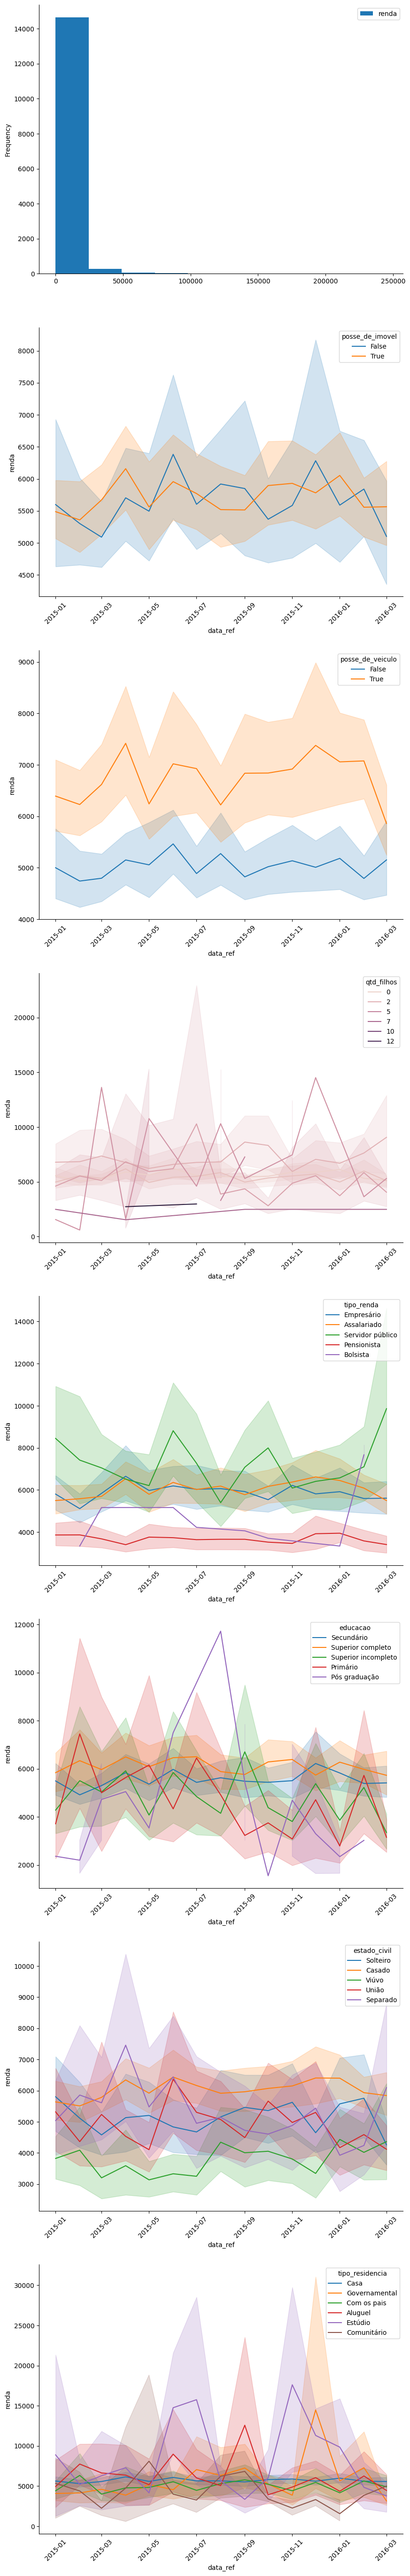

In [ ]:
fig, ax = plt.subplots(8,1,figsize=(10,70))
renda[['posse_de_imovel','renda']].plot(kind='hist', ax=ax[0])
sns.lineplot(x='data_ref',y='renda', hue='posse_de_imovel',data=renda, ax=ax[1])
ax[1].tick_params(axis='x', rotation=45)
sns.lineplot(x='data_ref',y='renda', hue='posse_de_veiculo',data=renda, ax=ax[2])
ax[2].tick_params(axis='x', rotation=45)
sns.lineplot(x='data_ref',y='renda', hue='qtd_filhos',data=renda, ax=ax[3])
ax[3].tick_params(axis='x', rotation=45)
sns.lineplot(x='data_ref',y='renda', hue='tipo_renda',data=renda, ax=ax[4])
ax[4].tick_params(axis='x', rotation=45)
sns.lineplot(x='data_ref',y='renda', hue='educacao',data=renda, ax=ax[5])
ax[5].tick_params(axis='x', rotation=45)
sns.lineplot(x='data_ref',y='renda', hue='estado_civil',data=renda, ax=ax[6])
ax[6].tick_params(axis='x', rotation=45)
sns.lineplot(x='data_ref',y='renda', hue='tipo_residencia',data=renda, ax=ax[7])
ax[7].tick_params(axis='x', rotation=45)
sns.despine()

<Axes: xlabel='idade', ylabel='renda'>

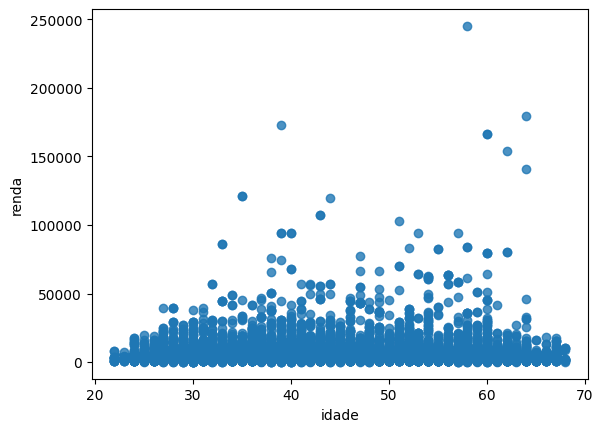

In [ ]:
sns.regplot(x = 'idade', y = 'renda', data = renda)

Vemos que há uma influência clara da posse de veículo na renda. Além disso, o estado civil e o tipo de renda também parecem influenciar na renda em si.

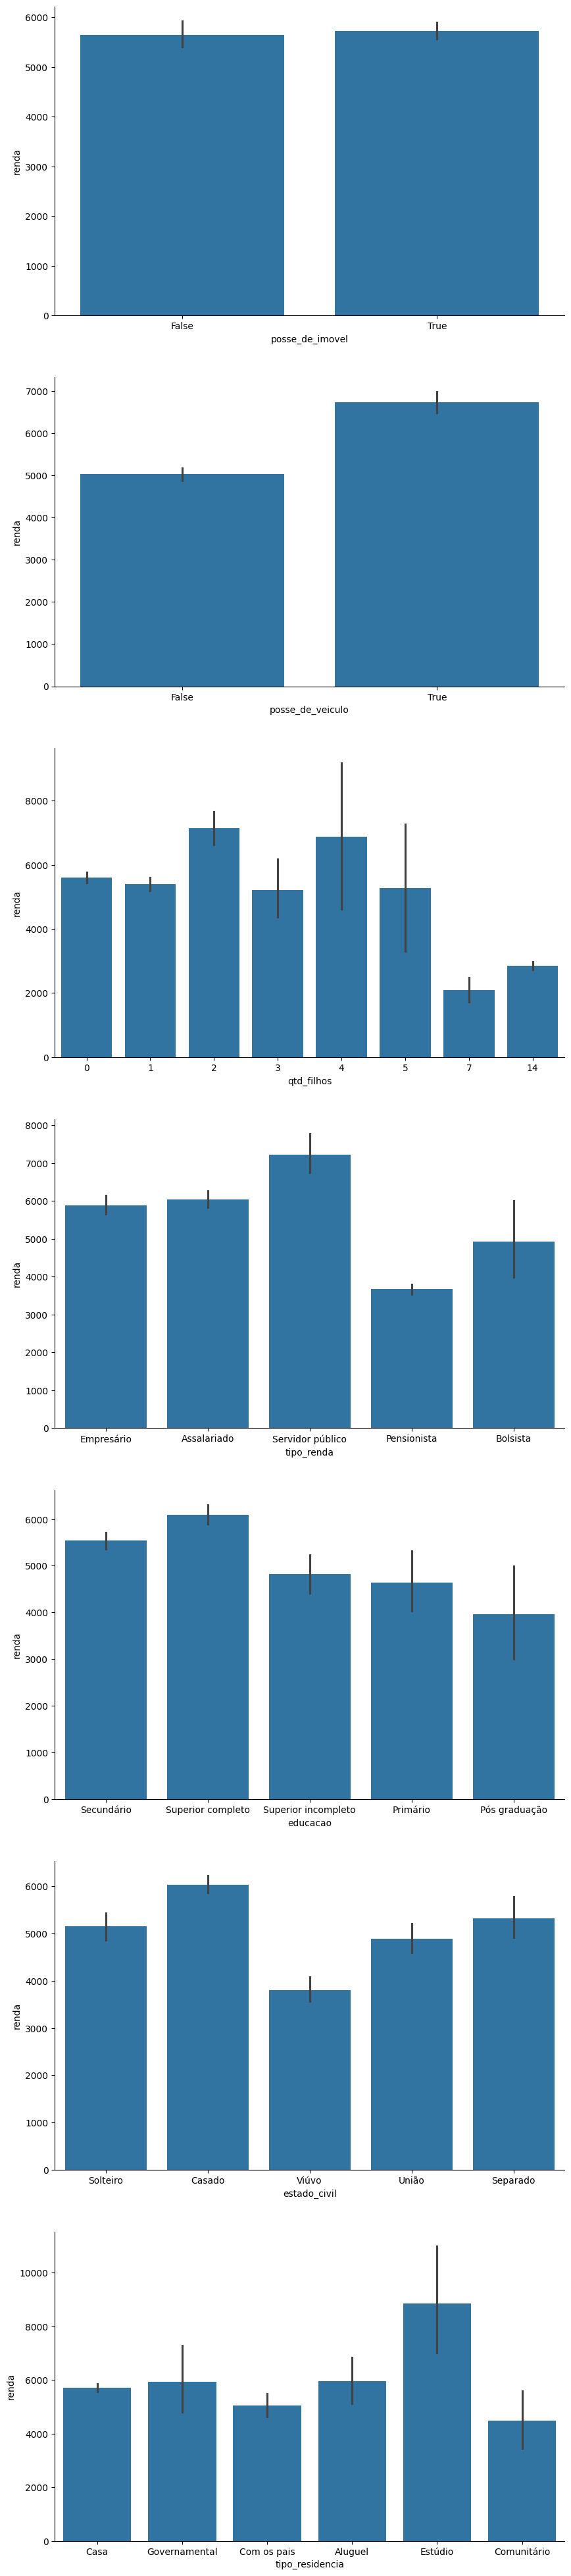

In [ ]:
fig, ax = plt.subplots(7,1,figsize=(10,50))
sns.barplot(x='posse_de_imovel',y='renda',data=renda, ax=ax[0])
sns.barplot(x='posse_de_veiculo',y='renda',data=renda, ax=ax[1])
sns.barplot(x='qtd_filhos',y='renda',data=renda, ax=ax[2])
sns.barplot(x='tipo_renda',y='renda',data=renda, ax=ax[3])
sns.barplot(x='educacao',y='renda',data=renda, ax=ax[4])
sns.barplot(x='estado_civil',y='renda',data=renda, ax=ax[5])
sns.barplot(x='tipo_residencia',y='renda',data=renda, ax=ax[6])
sns.despine()

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



<span style="color:red">Primeiramente, iremos retirar as colunas que não nos interessam na análise e, em seguida, retiraremos as linhas duplicadas e os valores nulos.</span>


In [ ]:
renda.drop(columns = ['posse_de_imovel', 'Unnamed: 0', 'data_ref', 'sexo', 'educacao', 'tipo_residencia', 'id_cliente',
                      'estado_civil','tipo_renda'], inplace = True)

In [ ]:
renda.dropna(inplace = True)

In [ ]:
renda.drop_duplicates(inplace = True)

In [ ]:
renda.dtypes

posse_de_veiculo            bool
qtd_filhos                 int64
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
dtype: object

O próximo passo é retirar outliers. Como visto no gráfico de renda por idade, a maior parte da renda se concentra em valores abaixo de 10000. Então, iremos trabalhar apenas com esses valores.

In [ ]:
renda = renda[renda['renda']<=10000]
renda.describe()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
count,6987.000000,6987.000000,6987.000000,6987.000000,6987.000000
mean,0.509231,40.292114,6.843442,2.290540,3741.909964
std,0.792731,9.322243,5.876365,0.946176,2301.613783
min,0.000000,22.000000,0.117808,1.000000,118.710000
25%,0.000000,33.000000,2.679452,2.000000,1923.815000
50%,0.000000,40.000000,5.430137,2.000000,3181.430000
75%,1.000000,47.000000,8.957534,3.000000,5169.550000
max,14.000000,66.000000,41.200000,15.000000,9991.300000


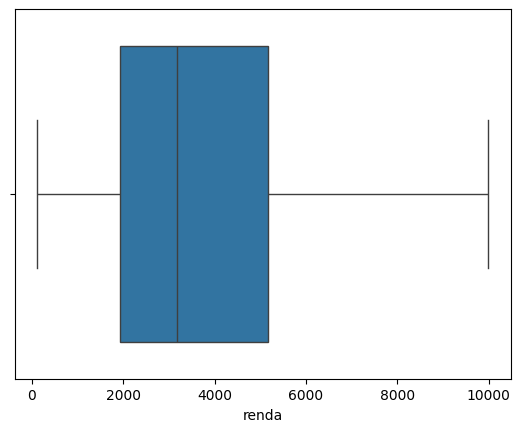

In [ ]:
sns.boxplot(x='renda',data=renda);

Agora sim, temos dados tratados e prontos para serem utilizados em um modelo de Machine Learning.

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


<span style="color:red">Vamos utilizar o modelo Random Forest para fazer a previsão de renda. Para isso, iremos antes fazer uma divisão entre 80% dos dados para treino e 20% para teste.</span>


In [ ]:
x = renda.drop(columns = ['renda'])
y = renda['renda']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5589, 5)
(1398, 5)
(5589,)
(1398,)


### Rodando o modelo


Vamos fazer uma otimização de hiper parâmetros:

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [ ]:
rf = RandomForestRegressor(n_estimators = 400, min_samples_split = 2,
                           min_samples_leaf = 4, max_features = 'sqrt',
                           max_depth = 10, bootstrap = True)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                      n_estimators=400)

In [ ]:
y_pred = rf.predict(x_test)
mse = mean_squared_error(y_pred, y_test)
print(mse)

4708050.487629429


## Etapa 5 Crisp-DM: Avaliação dos resultados


<span style="color:red">Podemos ver que os resultados não foram muito bons, provavelmente devido à baixa correlação entre as variáveis.</span>


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.